##Food Delivery Time Prediction 

In [207]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from datetime import datetime


In [208]:
df= pd.read_csv("data/train.csv",encoding='unicode_escape')
df2= pd.read_csv("data/test.csv",encoding='unicode_escape')
df=pd.DataFrame(df)
df2=pd.DataFrame(df2)
df = pd.concat([df, df2], ignore_index=True)

In [209]:
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24.000000
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.000000
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.000000
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.000000
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56987,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian,21.972500
56988,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian,29.390000
56989,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,26.244167
56990,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian,23.752500


In [210]:
df.drop(["ID","Delivery_person_ID"],axis=1,inplace=True)

In [211]:
df.replace("NaN ", np.nan, inplace=True)

In [212]:
df.dropna(inplace=True)

In [213]:
df.head(20)

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.0
5,22,4.8,17.431668,78.408321,17.461668,78.438321,11-03-2022,21:20:00,21:30:00,conditions Cloudy,Jam,0,Buffet,motorcycle,1,No,Urban,26.0
6,33,4.7,23.369746,85.339820,23.479746,85.449820,04-03-2022,19:15:00,19:30:00,conditions Fog,Jam,1,Meal,scooter,1,No,Metropolitian,40.0
7,35,4.6,12.352058,76.606650,12.482058,76.736650,14-03-2022,17:25:00,17:30:00,conditions Cloudy,Medium,2,Meal,motorcycle,1,No,Metropolitian,32.0
8,22,4.8,17.433809,78.386744,17.563809,78.516744,20-03-2022,20:55:00,21:05:00,conditions Stormy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,34.0
9,36,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55:00,22:10:00,conditions Fog,Jam,2,Snack,motorcycle,3,No,Metropolitian,46.0


In [214]:
df.isnull().sum()

Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Order_Date                     0
Time_Orderd                    0
Time_Order_picked              0
Weatherconditions              0
Road_traffic_density           0
Vehicle_condition              0
Type_of_order                  0
Type_of_vehicle                0
multiple_deliveries            0
Festival                       0
City                           0
Time_taken(min)                0
dtype: int64

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51659 entries, 0 to 56991
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Delivery_person_Age          51659 non-null  object 
 1   Delivery_person_Ratings      51659 non-null  object 
 2   Restaurant_latitude          51659 non-null  float64
 3   Restaurant_longitude         51659 non-null  float64
 4   Delivery_location_latitude   51659 non-null  float64
 5   Delivery_location_longitude  51659 non-null  float64
 6   Order_Date                   51659 non-null  object 
 7   Time_Orderd                  51659 non-null  object 
 8   Time_Order_picked            51659 non-null  object 
 9   Weatherconditions            51659 non-null  object 
 10  Road_traffic_density         51659 non-null  object 
 11  Vehicle_condition            51659 non-null  int64  
 12  Type_of_order                51659 non-null  object 
 13  Type_of_vehicle      

In [216]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].astype(int)
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].astype(float)
df['multiple_deliveries'] = df['multiple_deliveries'].astype(int)


In [217]:
def get_day_of_week(date_str):
    # Convert string to datetime object
    date_obj = datetime.strptime(date_str, "%d-%m-%Y")
    # Get the day of the week
    return date_obj.strftime("%A")

# Convert 'Order_Date' to string (in case there are NaN values)
df['Order_Date'] = df['Order_Date'].astype(str)

# Apply function to each row in the 'Order_Date' column
df['day'] = df['Order_Date'].apply(get_day_of_week)

print(df.head())  # Check the result


   Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                   37                      4.9            22.745049   
1                   34                      4.5            12.913041   
2                   23                      4.4            12.914264   
3                   38                      4.7            11.003669   
4                   32                      4.6            12.972793   

   Restaurant_longitude  Delivery_location_latitude  \
0             75.892471                   22.765049   
1             77.683237                   13.043041   
2             77.678400                   12.924264   
3             76.976494                   11.053669   
4             80.249982                   13.012793   

   Delivery_location_longitude  Order_Date Time_Orderd Time_Order_picked  \
0                    75.912471  19-03-2022    11:30:00          11:45:00   
1                    77.813237  25-03-2022    19:45:00          19:50:00   
2       

In [218]:
import pandas as pd
from datetime import datetime

# Function to classify time
def classify_time(time_str):
    # Convert string to datetime time object
    time_obj = datetime.strptime(time_str, "%H:%M:%S").time()
    
    # Define time categories
    if time_obj >= datetime.strptime("05:00:00", "%H:%M:%S").time() and time_obj < datetime.strptime("12:00:00", "%H:%M:%S").time():
        return "Morning"
    elif time_obj >= datetime.strptime("12:00:00", "%H:%M:%S").time() and time_obj < datetime.strptime("17:00:00", "%H:%M:%S").time():
        return "Afternoon"
    elif time_obj >= datetime.strptime("17:00:00", "%H:%M:%S").time() and time_obj < datetime.strptime("21:00:00", "%H:%M:%S").time():
        return "Evening"
    else:
        return "Night"

# Apply function to classify time
df['Time_Category'] = df['Time_Orderd'].apply(classify_time)

print(df)  # Check the result


       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                       37                      4.9            22.745049   
1                       34                      4.5            12.913041   
2                       23                      4.4            12.914264   
3                       38                      4.7            11.003669   
4                       32                      4.6            12.972793   
...                    ...                      ...                  ...   
56986                   31                      4.7             0.000000   
56987                   35                      4.6            26.905190   
56988                   33                      4.9            26.902940   
56990                   27                      4.7            22.320000   
56991                   39                      5.0            13.081878   

       Restaurant_longitude  Delivery_location_latitude  \
0                 75.892471 

In [219]:
import pandas as pd
from datetime import datetime

# Function to calculate time difference in minutes
def time_difference(start, end):
    # Convert to datetime.time objects
    start_time = datetime.strptime(start, "%H:%M:%S")
    end_time = datetime.strptime(end, "%H:%M:%S")

    # Calculate the difference
    diff = end_time - start_time

    # Handle case where End_Time is on the next day
    if diff.days < 0:
        diff = diff + pd.Timedelta(days=1)

    return diff.total_seconds() / 60  # Convert seconds to minutes

# Apply function to calculate the difference
df['Order_ready'] = df.apply(lambda x: time_difference(x['Time_Orderd'], x['Time_Order_picked']), axis=1)

print(df)  # Check the result


       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
0                       37                      4.9            22.745049   
1                       34                      4.5            12.913041   
2                       23                      4.4            12.914264   
3                       38                      4.7            11.003669   
4                       32                      4.6            12.972793   
...                    ...                      ...                  ...   
56986                   31                      4.7             0.000000   
56987                   35                      4.6            26.905190   
56988                   33                      4.9            26.902940   
56990                   27                      4.7            22.320000   
56991                   39                      5.0            13.081878   

       Restaurant_longitude  Delivery_location_latitude  \
0                 75.892471 

In [220]:
def haversine_vectorized(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371
    return c * r

df['distance_km'] = haversine_vectorized(
    df['Restaurant_latitude'].values,
    df['Restaurant_longitude'].values,
    df['Delivery_location_latitude'].values,
    df['Delivery_location_longitude'].values
)



Standardisation

In [221]:
df.drop(["Order_Date","Time_Orderd","Time_Order_picked","Restaurant_latitude","Restaurant_longitude","Delivery_location_latitude","Delivery_location_longitude"],axis=1,inplace=True)

In [222]:
df

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),day,Time_Category,Order_ready,distance_km
0,37,4.9,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24.000000,Saturday,Morning,15.0,3.025149
1,34,4.5,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33.000000,Friday,Evening,5.0,20.183530
2,23,4.4,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26.000000,Saturday,Morning,15.0,1.552758
3,38,4.7,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21.000000,Tuesday,Evening,10.0,7.790401
4,32,4.6,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30.000000,Saturday,Afternoon,15.0,6.210138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56986,31,4.7,conditions Windy,Low,2,Snack,scooter,1,No,Metropolitian,25.089167,Sunday,Morning,10.0,1.572534
56987,35,4.6,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian,21.972500,Sunday,Night,10.0,16.384901
56988,33,4.9,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian,29.390000,Friday,Morning,5.0,1.489842
56990,27,4.7,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian,23.752500,Sunday,Evening,5.0,19.687777


In [223]:
df['Type_of_order'].value_counts()

Type_of_order
Snack      12955
Meal       12946
Drinks     12937
Buffet     12821
Name: count, dtype: int64

In [224]:
df['Type_of_vehicle'].value_counts()

Type_of_vehicle
motorcycle           30362
scooter              17148
electric_scooter      4149
Name: count, dtype: int64

In [225]:
df['Weatherconditions'].value_counts()

Weatherconditions
conditions Fog           8752
conditions Cloudy        8668
conditions Stormy        8664
conditions Windy         8618
conditions Sandstorms    8574
conditions Sunny         8383
Name: count, dtype: int64

In [226]:
df['City'].value_counts()

City
Metropolitian     39716
Urban             11746
Semi-Urban          197
Name: count, dtype: int64

Text(0, 0.5, 'rating')

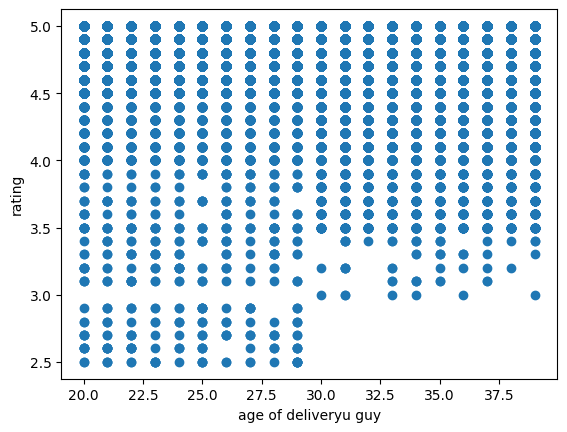

In [227]:
plt.scatter(df['Delivery_person_Age'],df['Delivery_person_Ratings'])
plt.xlabel("age of deliveryu guy")
plt.ylabel("rating")

<Axes: xlabel='Type_of_vehicle', ylabel='Time_taken(min)'>

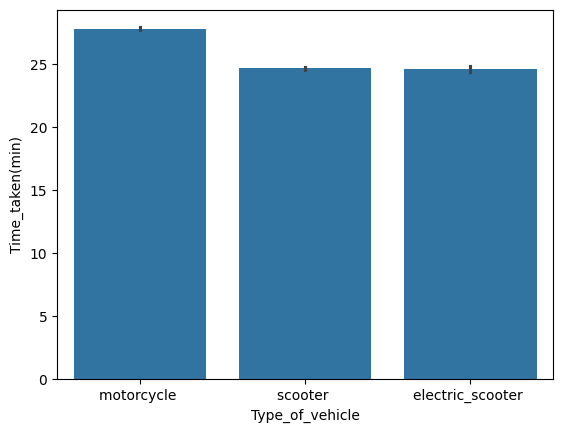

In [228]:
sns.barplot(x="Type_of_vehicle",y="Time_taken(min)",data=df)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51659 entries, 0 to 56991
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      51659 non-null  int64  
 1   Delivery_person_Ratings  51659 non-null  float64
 2   Weatherconditions        51659 non-null  object 
 3   Road_traffic_density     51659 non-null  object 
 4   Vehicle_condition        51659 non-null  int64  
 5   Type_of_order            51659 non-null  object 
 6   Type_of_vehicle          51659 non-null  object 
 7   multiple_deliveries      51659 non-null  int64  
 8   Festival                 51659 non-null  object 
 9   City                     51659 non-null  object 
 10  Time_taken(min)          51659 non-null  float64
 11  day                      51659 non-null  object 
 12  Time_Category            51659 non-null  object 
 13  Order_ready              51659 non-null  float64
 14  distance_km              51

In [232]:

x=df.drop(['Time_taken(min)'],axis=1)
y=df['Time_taken(min)']

In [233]:
num_features=x.select_dtypes(exclude="object").columns
non_num_features=x.select_dtypes(include="object").columns
num_features

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Vehicle_condition',
       'multiple_deliveries', 'Order_ready', 'distance_km'],
      dtype='object')

In [234]:
Standard=StandardScaler()
onehot=OneHotEncoder()
preprocessor=ColumnTransformer([("OneHotEncoder",onehot,non_num_features),
                                ("StandardScaler",Standard,num_features)])

In [235]:
x.head()

,Delivery_person_Age,Delivery_person_Ratings,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,day,Time_Category,Order_ready,distance_km
0,37,4.9,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,Saturday,Morning,15.0,3.025149
1,34,4.5,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,Friday,Evening,5.0,20.183530
2,23,4.4,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,Saturday,Morning,15.0,1.552758
3,38,4.7,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,Tuesday,Evening,10.0,7.790401
4,32,4.6,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,Saturday,Afternoon,15.0,6.210138


In [236]:
y.head()

0    24.0
1    33.0
2    26.0
3    21.0
4    30.0
Name: Time_taken(min), dtype: float64

Feature Scaling 

train and test split 

In [247]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=42)
x_train.shape, x_test.shape

((34611, 14), (17048, 14))

In [248]:

x_train=preprocessor.fit_transform(x_train)

In [249]:
x_test=preprocessor.transform(x_test)

In [250]:
x_train

array([[ 0.        ,  0.        ,  0.        , ...,  0.44085044,
        -0.00446896, -0.04766022],
       [ 0.        ,  0.        ,  1.        , ...,  0.44085044,
        -1.232049  , -0.0838608 ],
       [ 0.        ,  0.        ,  1.        , ..., -1.3031517 ,
        -1.232049  , -0.02339433],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.44085044,
         1.22311109, -0.07874546],
       [ 0.        ,  0.        ,  0.        , ...,  0.44085044,
         1.22311109, -0.02554509],
       [ 1.        ,  0.        ,  0.        , ...,  0.44085044,
        -1.232049  , -0.07399572]])

##Model Training By  Linear Logistic Regression 

In [251]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()
regression.fit(x_train,y_train)

reg_predicted=regression.predict(x_test)



print(mean_absolute_error(y_test,reg_predicted))
print(mean_squared_error(y_test,reg_predicted))
print(np.sqrt(mean_squared_error(y_test,reg_predicted)))
print(r2_score(y_test,reg_predicted))

4.586682595969616
33.66551269231908
5.802198953183102
0.6003539537677124


##Model Training By Lasso Logistic Regression 

In [260]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
lasso_predicted=lasso.predict(x_test)

print(mean_absolute_error(y_test,lasso_predicted))
print(mean_squared_error(y_test,lasso_predicted))
print(np.sqrt(mean_squared_error(y_test,lasso_predicted)))
print(r2_score(y_test,lasso_predicted))

5.677515326243705
51.36812188276721
7.167155773580425
0.3902048366098416


##Model Training By Ridge Regression 

In [261]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
ridge_predicted=ridge.predict(x_test)

print(mean_absolute_error(y_test,ridge_predicted))
print(mean_squared_error(y_test,ridge_predicted))
print(np.sqrt(mean_squared_error(y_test,ridge_predicted)))
print(r2_score(y_test,ridge_predicted))

4.585755849836463
33.65370440120557
5.801181293599225
0.6004941309543605


##Model Training By Elasticnet Regression 

In [262]:
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet()
elasticnet.fit(x_train,y_train)
elastic_predicted=elasticnet.predict(x_test)

print(mean_absolute_error(y_test,elastic_predicted))
print(mean_squared_error(y_test,elastic_predicted))
print(np.sqrt(mean_squared_error(y_test,elastic_predicted)))
print(r2_score(y_test,elastic_predicted))

5.78091243123467
52.571925188383766
7.2506499838555
0.37591438941160904


##Model Training By Logistic Regression 

In [263]:
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(x_train,y_train)
logistic_predicted=logistic.predict(x_test)

print(mean_absolute_error(y_test,logistic_predicted))
print(mean_squared_error(y_test,logistic_predicted))
print(np.sqrt(mean_squared_error(y_test,logistic_predicted)))
print(r2_score(y_test,logistic_predicted))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

##Model Training By Supoort Vector Machine Regression 


In [264]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)
svr_predicted=svr.predict(x_test)

print(mean_absolute_error(y_test,svr_predicted))
print(mean_squared_error(y_test,svr_predicted))
print(np.sqrt(mean_squared_error(y_test,svr_predicted)))
print(r2_score(y_test,svr_predicted))

KeyboardInterrupt: 

##Model Training By K Nearest Neighbor Regression 


In [265]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
KNeighbors_predicted=knn.predict(x_test)

print(mean_absolute_error(y_test,KNeighbors_predicted))
print(mean_squared_error(y_test,KNeighbors_predicted))
print(np.sqrt(mean_squared_error(y_test,KNeighbors_predicted)))
print(r2_score(y_test,KNeighbors_predicted))

4.15641043915908
29.88530356878088
5.466745244547333
0.645229124508776


##Model Training By Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
Decisiontree_regressor=DecisionTreeRegressor()
Decisiontree_regressor.fit(x_train,y_train)
decision_predicted=Decisiontree_regressor.predict(x_test)

print(mean_absolute_error(y_test,decision_predicted))
print(mean_squared_error(y_test,decision_predicted))
print(np.sqrt(mean_squared_error(y_test,decision_predicted)))
print(r2_score(y_test,decision_predicted))

7.976373251450018
106.79503379311465
10.334168268085955
-0.2167860092274616


##Model Training By Random Forest Regression


In [ ]:
from sklearn.ensemble import RandomForestRegressor
Randomforest_regressor=RandomForestRegressor()
Randomforest_regressor.fit(x_train,y_train)
random_predicted=Randomforest_regressor.predict(x_test)

print(mean_absolute_error(y_test,random_predicted))
print(mean_squared_error(y_test,random_predicted))
print(np.sqrt(mean_squared_error(y_test,random_predicted)))
print(r2_score(y_test,random_predicted))

6.1174307427881045
61.49486750566327
7.84186632796449
0.29934855805053595


##Model Training By AdaBoost Regression


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
Adaboost_regressor=AdaBoostRegressor()
Adaboost_regressor.fit(x_train,y_train)
adaboost_predicted=Adaboost_regressor.predict(x_test)

print(mean_absolute_error(y_test,adaboost_predicted))
print(mean_squared_error(y_test,adaboost_predicted))
print(np.sqrt(mean_squared_error(y_test,adaboost_predicted)))
print(r2_score(y_test,adaboost_predicted))

6.0238008122651285
56.44173908674003
7.512771731307962
0.3569221712101761


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
Gradient_regressor=AdaBoostRegressor()
Gradient_regressor.fit(x_train,y_train)
gradient_predicted=Gradient_regressor.predict(x_test)

print(mean_absolute_error(y_test,gradient_predicted))
print(mean_squared_error(y_test,gradient_predicted))
print(np.sqrt(mean_squared_error(y_test,gradient_predicted)))
print(r2_score(y_test,gradient_predicted))

6.039429410640205
56.80935363587939
7.537197996329895
0.3527336970434114


In [ ]:
from xgboost import XGBRegressor
xgb_regressor=XGBRegressor()
xgb_regressor.fit(x_train,y_train)
xgb_predicted=xgb_regressor.predict(x_test)

print(mean_absolute_error(y_test,xgb_predicted))
print(mean_squared_error(y_test,xgb_predicted))
print(np.sqrt(mean_squared_error(y_test,xgb_predicted)))
print(r2_score(y_test,xgb_predicted))

5.782647440074079
54.05213927067639
7.352016000436642
0.3841484785079956


^C
Note: you may need to restart the kernel to use updated packages.


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 991.0 kB/s eta 0:02:32
   ---------------------------------------- 0.0/150.0 MB 991.0 kB/s eta 0:02:32
   ---------------------------------------- 0.2/150.0 MB 1.5 MB/s eta 0:01:40
   ---------------------------------------- 0.2/150.0 MB 1.5 MB/s eta 0:01:40
   ---------------------------------------- 0.3/150.0 MB 1.1 MB/s eta 0:02:14
   ---------------------------------------- 0.3/150.0 MB 1.1 MB/s eta 0:02:14
   ---------------------------------------- 0.3/150.0 MB 1.1 MB/s eta 0:02:13
   ---------------------------------------- 0.4/150.0 MB 1.1 MB/s eta 0:02:16
   ---------------------------------------- 0.4/150.0 MB 1.2 MB/s eta 0:02:09
   ---------------------------------------- 0.5/150.0 MB 1.2 MB/s eta 0:02:04
   ---------------------------------------- 0.5/150.0 MB 1.2 MB/s eta 0:02

In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [266]:
models = {
        "Linear Regression": LinearRegression(),
        "Lasso":Lasso(),
        "ridge":Ridge(),
        "elasticnet":ElasticNet(),
        #"logistic":LogisticRegression(),
        "svr":SVR(),
        "knn":KNeighborsRegressor(),
        "Decision Tree": DecisionTreeRegressor(),
        "Random Forest": RandomForestRegressor(),
        "AdaBoost Regressor": AdaBoostRegressor(),
        "Gradient Boosting": GradientBoostingRegressor(),
        "XGBRegressor": XGBRegressor(),
        }
           
params={
        "Linear Regression":{},

        "Lasso":{},

        "ridge":{},

        "elasticnet":{},

        "logistic":{
            'penalty':['l1', 'l2', 'elasticnet'],
            'C':[100,10,1.0,0.1,0.01],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
        },

        "svr":{
            'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']
        },

        "knn":{},

        "Decision Tree": {
            'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
            # 'splitter':['best','random'],
            # 'max_features':['sqrt','log2'],
        },

        "Random Forest":{
            # 'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                 
            # 'max_features':['sqrt','log2',None],
            'n_estimators': [8,16,32,64,128,256]
        },

        "AdaBoost Regressor":{
            'learning_rate':[.1,.01,0.5,.001],
          # 'loss':['linear','square','exponential'],
            'n_estimators': [8,16,32,64,128,256]
        },

        "Gradient Boosting":{
            # 'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
            'learning_rate':[.1,.01,.05,.001],
            'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],
            # 'criterion':['squared_error', 'friedman_mse'],
            # 'max_features':['auto','sqrt','log2'],
            'n_estimators': [8,16,32,64,128,256]
        },
        
        "XGBRegressor":{
            'learning_rate':[.1,.01,.05,.001],
            'n_estimators': [8,16,32,64,128,256]
        }
}

In [267]:
def evaluate_models(x_train, y_train,x_test,y_test,models):#,param):
    report = {}
    for i in range(len(list(models))):
        model = list(models.values())[i]
        '''
        para=param[list(models.keys())[i]]
        gs = GridSearchCV(model,para,cv=3)
        gs.fit(x_train,y_train)
        model.set_params(**gs.best_params_)'''
        
        model.fit(x_train,y_train)

        y_train_pred = model.predict(x_train)

        y_test_pred = model.predict(x_test)

        train_model_score = r2_score(y_train, y_train_pred)

        test_model_score = r2_score(y_test, y_test_pred)

        report[list(models.keys())[i]] = test_model_score
        print(train_model_score)
    return report 


In [268]:
model_report:dict=evaluate_models(x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test,
                                             models=models)#,param=params)
            
## To get best model score from dict
best_model_score = max(sorted(model_report.values()))

## To get best model name from dict
best_model_name = list(model_report.keys())[
        list(model_report.values()).index(best_model_score)
]
best_model = models[best_model_name]

predicted=best_model.predict(x_test)


0.5999810556267957
0.3902702871685728
0.6000242237360848
0.37581023164567473
0.7270855917039066
0.765901946905896
0.9999938111819929
0.9796275985579356
0.6704041564854846
0.8057602988766017
0.8911641222927328


In [269]:
print(best_model)
print()
for i in model_report:
    print(i,model_report[i])

RandomForestRegressor()

Linear Regression 0.6003539537677124
Lasso 0.3902048366098416
ridge 0.6004941309543605
elasticnet 0.37591438941160904
svr 0.7141208140764521
knn 0.645229124508776
Decision Tree 0.7264128827292846
Random Forest 0.8534604014896731
AdaBoost Regressor 0.6737073999857283
Gradient Boosting 0.8069539357976263
XGBRegressor 0.852151645425124


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

## compile the model
model.compile(optimizer='adam',loss='MeanSquaredError',metrics=['R2Score'])

model.summary()
history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    epochs=20
)
test_loss,test_r2=model.evaluate(x_test,y_test)
print(f'Test R2 score : {test_r2}')

d:\vit study\self preparation\machine learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                │ (None, 64)             │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,673 (18.25 KB)

 Trainable params: 4,673 (18.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - R2Score: -1.2690 - loss: 195.9956 - val_R2Score: 0.6449 - val_loss: 29.9146
Epoch 2/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - R2Score: 0.6527 - loss: 29.2050 - val_R2Score: 0.6799 - val_loss: 26.9673
Epoch 3/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.6890 - loss: 26.2565 - val_R2Score: 0.6938 - val_loss: 25.7944
Epoch 4/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - R2Score: 0.7019 - loss: 24.9246 - val_R2Score: 0.7096 - val_loss: 24.4622
Epoch 5/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - R2Score: 0.7147 - loss: 23.6237 - val_R2Score: 0.7109 - val_loss: 24.3543
Epoch 6/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - R2Score: 0.7199 - loss: 23.2741 - val_R2Score: 0.7234 - val_loss: 23.2962
Epoch 7/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - R2Score: 0.7299 - loss: 22.5049 - val_R2Score: 0.7223 - val_loss: 23.3955
Epoch 8/20
1082/1082 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - R2Score: 0.7380 - loss: 21.9947 

In [37]:
from flask import Flask, request, render_template
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

app = Flask(__name__)

# Define the categories used for OneHotEncoding
order_categories = ['Snack', 'Meal', 'Drinks', 'Buffet']
vehicle_categories = ['motorcycle', 'scooter', 'electric_scooter', 'bicycle']

# Load trained model (assuming it's in memory from Jupyter)
model = best_model  # Replace with your trained model

# Recreate the encoders & scaler (same as used in training)
onehot = OneHotEncoder(categories=[order_categories, vehicle_categories], handle_unknown='ignore')
scaler = StandardScaler()

# Define the preprocessor as used during training
preprocessor = ColumnTransformer([
    ("OneHotEncoder", onehot, [0, 1]),  # Encoding Type_of_order & Type_of_vehicle
    ("StandardScaler", scaler, [2, 3])  # Scaling numerical columns (age, rating, distance)
])

@app.route('/')
def home():
    return render_template("home.html")

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get input data from form
        age = float(request.form['Delivery_person_Age'])
        rating = float(request.form['Delivery_person_Ratings'])
        order = request.form['Type_of_order']
        vehicle = request.form['Type_of_vehicle']
        distance = float(request.form['distance_km'])

        # Transform categorical variables using OneHotEncoder
        order_encoded = [1 if order == cat else 0 for cat in order_categories]
        vehicle_encoded = [1 if vehicle == cat else 0 for cat in vehicle_categories]

        # Combine features in the correct order (without Time_taken as input)
        input_features = np.array(order_encoded + vehicle_encoded + [age, rating, distance]).reshape(1, -1)

        # Predict delivery time
        prediction = model.predict(input_features)

        return render_template("home.html", prediction=f"{prediction[0]:.2f} minutes")

    except Exception as e:
        return f"Error: {str(e)}"

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [24/Mar/2025 18:40:50] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2025 18:40:50] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [24/Mar/2025 18:41:06] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2025 18:41:23] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2025 18:41:38] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2025 18:41:54] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2025 18:42:17] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2025 18:42:31] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [24/Mar/2025 18:42:49] "POST /predict HTTP/1.1" 200 -
